Анализ данных Сбермаркет.

Задачи для аналитика:

Динамика по недельная общего CR (Contact Rate) по внешней сборке

Динамика по недельная общего CR внутренней сборке (быстрая доставка)

Выводы из по CR внешней сборки

Сравнение CR по заявкам чата и голоса в понедельной динамике (внешняя сборка и быстрая доставка наша сборка)

Сравнение CR по заявкам партнеров, ритейлеров и исходящим звонкам в понедельной динамике (внешняя сборка и быстрая доставка наша сборка)

Топ тематик по внешней сборке по чату и голосу, исходящим звонкам и заявкам партнеров. 

Ключевой вывод

Сравнение ключевых тематик внешней сборки с тематиками быстрой доставки на нашей сборке по 
CR
CSI

Ключевой вывод

In [180]:
# Производим импорт необходимых библиотек

import pandas as pd
import seaborn as sns

In [181]:
# Считываем данные

cnt_delivered_data = pd.read_csv("C:/Users/User/PycharmProjects/Portfolio/Sbermarket_data_analysis/Data/cnt_delivered.csv")
request_agg = pd.read_csv("C:/Users/User/PycharmProjects/Portfolio/Sbermarket_data_analysis/Data/request_agg.csv")

# Производим ознакомление со структурой данных (Описание данных предоставлено в файле вместе с заданием по ссылке:https://drive.google.com/drive/folders/1x4xcB0S1m3bGwcQyNZj4i7vApJjMCch2)

# Типы данных
print(cnt_delivered_data.dtypes)
print(request_agg.dtypes)

print("\n","cnt_delivered_data")

# Значения принимаемые тем или иным типом для cnt_delivered_data
for i in cnt_delivered_data.columns:
    if cnt_delivered_data[i].nunique() <= 5:
        print(f"\n {i}: Принимает значения: {cnt_delivered_data[i].unique()}")
    else:
        print(f"\n {i}: Принимает значения: {cnt_delivered_data[i].unique()[:5]}")
        
print("\n", "request_agg")
        
# Значения принимаемые тем или иным типом для request_agg
for i in request_agg.columns:
    if request_agg[i].nunique() <= 5:
        print(f"\n {i}: Принимает значения: {request_agg[i].unique()}")
    else:
        print(f"\n {i}: Принимает значения: {request_agg[i].unique()[:5]}")

dt                     object
assembly_type          object
type_store_delivery    object
cnt_delivered           int64
dtype: object
dt                     object
type_appeal            object
direction              object
theme                  object
subtheme               object
assembly_type          object
type_store_delivery    object
total_bid               int64
numerator_csi           int64
total_rates             int64
dtype: object

 cnt_delivered_data

 dt: Принимает значения: ['12/18/2022' '12/17/2022' '12/16/2022' '12/15/2022' '12/14/2022']

 assembly_type: Принимает значения: ['внутренняя' 'внешняя']

 type_store_delivery: Принимает значения: ['planned' 'on_demand' 'marketplace']

 cnt_delivered: Принимает значения: [119611  18686  25583  38943  10008]

 request_agg

 dt: Принимает значения: ['12/5/2022' '12/18/2022' '12/7/2022' '12/6/2022' '12/9/2022']

 type_appeal: Принимает значения: ['Партнерский' 'Клиентский']

 direction: Принимает значения: ['Исход' 'Голос' 'Чат

Столбец	Описание

dt	Дата заказа

assembly_type	Тип сборки заказа. Внутренняя - силами партнеров или внешняя - силами ритейлера

type_store_delivery	Признак магазина. On-demand - быстрая доставка, planned - плановая доставка 

cnt_delivered	Количество заказов

dt	Дата обращения

type_appeal	CR делиться за клиентский - полученный на входящих звонках и входящих чатах и партнерский - это заявки от партнеров, ритейлеров и исходящие звонки

direction	Тут как раз идет разделение на тип коммуникации. Голос - входящий звонок от клиента, чат - входящий чат от клиента, Заявки партнера - обращения от наших сотрудников по заказам, исход - звонки которые мы инициируем (относим к партнерскому CR), и поддрежка ритейлеров - заявки от ритейлера по заказам(аналогично поддержке портнеров)

theme	тема звонка/чата/заявки

subtheme	подтема звонка/чата/заявки

assembly_type	Тип сборки заказа. Внутренняя - силами партнеров или внешняя - силами ритейлера, пусто значит что мы не смогли определить кто собирал заказ по которому обратились

type_store_delivery	Признак магазина. On-demand - быстрая доставка, planned - плановая доставка 

total_bid	кол-во обращений

numerator_csi	числитель для csi 

total_rates	всего оценок(знаменатель для csi) 

In [182]:
# Проверяем количество пропущенных значений

print("Пропущенные значения в cnt_delivered_data")

for i in cnt_delivered_data.columns:
    print(f"{i}: {cnt_delivered_data[i].isna().sum()}")
    
print("Пропущенные значения в request_agg")

for i in request_agg.columns:
    print(f"{i}: {request_agg[i].isna().sum()}")

Пропущенные значения в cnt_delivered_data
dt: 0
assembly_type: 0
type_store_delivery: 0
cnt_delivered: 0
Пропущенные значения в request_agg
dt: 0
type_appeal: 0
direction: 0
theme: 0
subtheme: 2472
assembly_type: 5741
type_store_delivery: 5741
total_bid: 0
numerator_csi: 0
total_rates: 0


In [183]:
# Наличие отсутсвующих значений в 3ех категориях согласованно с описанием данных категорий
# Необходимо преобразование типа для параметра dt

In [184]:
# Производим преобразование dt при помощи метода astype
cnt_delivered_data["transformed_date"] = cnt_delivered_data["dt"].astype("datetime64[ns]")
request_agg["transformed_date"] = request_agg["dt"].astype("datetime64[ns]")

# Добавляем недели для удобства дальнейщего расчета (Так, как в данных в наличии только один год для идентификации недели достаточно ее номера внутри года 
cnt_delivered_data["week"] = cnt_delivered_data['transformed_date'].dt.isocalendar().week
request_agg["week"] = request_agg['transformed_date'].dt.isocalendar().week

print(cnt_delivered_data.sample(5))
print(request_agg.sample(5))

            dt assembly_type type_store_delivery  cnt_delivered  \
4   12/18/2022       внешняя             planned          10008   
39  12/11/2022    внутренняя           on_demand          38065   
34  12/12/2022    внутренняя           on_demand          33374   
27  12/13/2022       внешняя           on_demand          17488   
21  12/14/2022    внутренняя         marketplace          23647   

   transformed_date  week  
4        2022-12-18    50  
39       2022-12-11    49  
34       2022-12-12    50  
27       2022-12-13    50  
21       2022-12-14    50  
               dt  type_appeal direction          theme       subtheme  \
13140   12/8/2022   Клиентский     Голос        Юр лица      Документы   
21522  12/12/2022   Клиентский     Голос  Зоны доставки            NaN   
13264   12/5/2022   Клиентский     Голос  Статус заказа         В пути   
18648  12/18/2022  Партнерский     Исход      Самовывоз      Самовывоз   
8928   12/15/2022  Партнерский     Исход      Опоздание  Ож

In [185]:
# Проверяем временной диапозон данных
print(cnt_delivered_data["transformed_date"].min(), cnt_delivered_data["transformed_date"].max())
print(request_agg["transformed_date"].min(), request_agg["transformed_date"].max())

2022-12-05 00:00:00 2022-12-18 00:00:00
2022-12-05 00:00:00 2022-12-18 00:00:00


Производим расчет следуюзих метрик:

Динамика по недельная общего CR (Contact Rate) по внешней сборке

Динамика по недельная общего CR внутренней сборке (быстрая доставка)

Contact Rate это отношения количества обращений к количеству заказов

кол-во обращений / кол-во заказов = CR

In [186]:
# Рассчитываем СR по внешней сборке

CR_outer_requests = request_agg\
    .query("assembly_type == 'внешняя'")\
    .groupby("week", as_index=False)\
    .agg({"total_bid": "sum"})

CR_outer_orders = cnt_delivered_data\
    .query("assembly_type == 'внешняя'")\
    .groupby("week", as_index=False)\
    .agg({"cnt_delivered": "sum"})

print(CR_outer_orders)
print(CR_outer_requests)

   week  cnt_delivered
0    49         196134
1    50         198441
   week  total_bid
0    49      30800
1    50      27966


In [187]:
CR_outer = CR_outer_requests.merge(CR_outer_orders, on="week", how="inner")
CR_outer["Contact_Rate"] = CR_outer["total_bid"]/CR_outer["cnt_delivered"]
CR_outer

,week,total_bid,cnt_delivered,Contact_Rate
0,49,30800,196134,0.157035
1,50,27966,198441,0.140929


In [188]:
# Рассчитываем СR по внтренней сборке

CR_inner_requests = request_agg\
    .query("assembly_type == 'внутренняя'")\
    .groupby("week", as_index=False)\
    .agg({"total_bid": "sum"})

CR_inner_orders = cnt_delivered_data\
    .query("assembly_type == 'внутренняя'")\
    .groupby("week", as_index=False)\
    .agg({"cnt_delivered": "sum"})

print(CR_inner_orders)
print(CR_inner_requests)

   week  cnt_delivered
0    49        1224806
1    50        1186467
   week  total_bid
0    49     275841
1    50     252602


In [189]:
CR_inner = CR_inner_requests.merge(CR_inner_orders, on="week", how="inner")
CR_inner["Contact_Rate"] = CR_inner["total_bid"]/CR_inner["cnt_delivered"]
CR_inner

,week,total_bid,cnt_delivered,Contact_Rate
0,49,275841,1224806,0.225212
1,50,252602,1186467,0.212903


<Axes: xlabel='week', ylabel='Contact_Rate'>

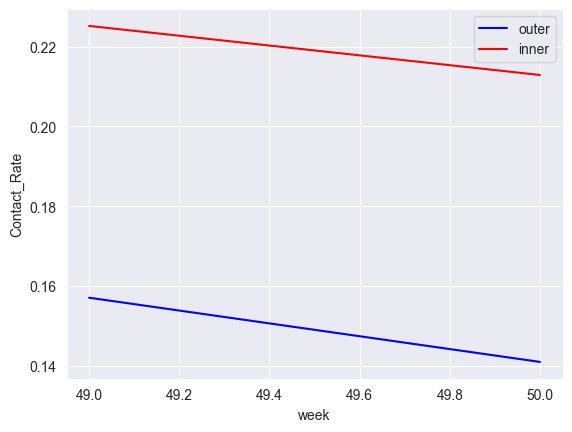

In [190]:
# Визуализируем динамику

sns.lineplot(data=CR_outer, x="week", y="Contact_Rate", color="blue", label="outer")
sns.lineplot(data=CR_inner, x="week", y="Contact_Rate", color="red", label="inner")

In [191]:
# анализируем СR по внешней сборке

# Создаем DataFrame c CR о внешней сборке в различных срезах
CR_outer_requests1 = request_agg\
    .query("assembly_type == 'внешняя'")\
    .groupby(["transformed_date","type_store_delivery"], as_index=False)\
    .agg({"total_bid": "sum"})

CR_outer_orders1 = cnt_delivered_data\
    .query("assembly_type == 'внешняя'")\
    .groupby(["transformed_date","type_store_delivery"], as_index=False)\
    .agg({"cnt_delivered": "sum"})

CR_outer1 = CR_outer_requests1.merge(CR_outer_orders1, on=["transformed_date", "type_store_delivery"], how="inner")
CR_outer1["Contact_Rate"] = CR_outer1["total_bid"]/CR_outer1["cnt_delivered"]

CR_outer1

,transformed_date,type_store_delivery,total_bid,cnt_delivered,Contact_Rate
0,2022-12-05,on_demand,3730,16757,0.222594
1,2022-12-05,planned,41,10010,0.004096
2,2022-12-06,on_demand,3299,16815,0.196194
3,2022-12-06,planned,18,10011,0.001798
4,2022-12-07,on_demand,3844,18877,0.203634
5,2022-12-07,planned,23,10014,0.002297
6,2022-12-08,on_demand,5225,17735,0.294615
7,2022-12-08,planned,15,10017,0.001497
8,2022-12-09,on_demand,4867,17885,0.272127
9,2022-12-09,planned,15,10022,0.001497


<Axes: xlabel='transformed_date', ylabel='Contact_Rate'>

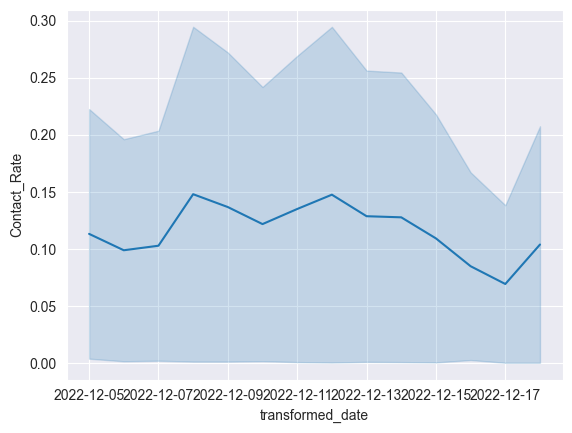

In [192]:
sns.lineplot(data=CR_outer1, x=CR_outer1["transformed_date"], y=CR_outer1["Contact_Rate"])

C:\Users\User\PycharmProjects\scientificProject1\.venv\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\User\PycharmProjects\scientificProject1\.venv\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='transformed_date', ylabel='Contact_Rate'>

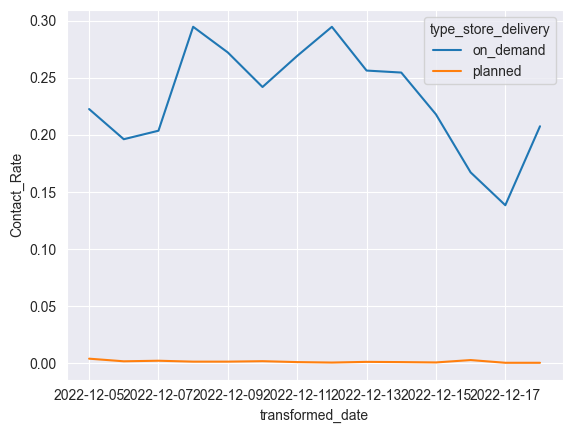

In [193]:
sns.lineplot(data=CR_outer1, x=CR_outer1["transformed_date"], y=CR_outer1["Contact_Rate"], hue=CR_outer1["type_store_delivery"])